## TASK : 02

**Company**: Prodigy Infotech  
**Intern Name**: Sunita Sahu  
**Internship Role**: Data Science Intern

### Aim of the Task

The aim of this task is to perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. This involves:

- **Data Cleaning**: Handling missing values, correcting inconsistencies, and preparing the dataset for analysis.
- **Data Analysis**: Conducting exploratory data analysis (EDA) to uncover relationships, patterns, and trends within the data.
- **Visualization**: Creating visual representations of the data to aid in understanding and communicating insights.
- **Reporting**: Documenting the findings and presenting insights in a clear and concise manner to stakeholders.

This task is intended to improve analytical skills, enhance understanding of data cleaning and EDA processes, and apply theoretical knowledge to practical data science tasks, thereby contributing to the company's data-driven decision-making.

### About the Dataset

For this task, we will be using the Titanic dataset. This dataset contains both numerical and categorical values.

The predefined columns are as follows:

- **Passenger ID**: A unique identifier for each passenger.
- **Survived**: An indicator of whether the passenger survived (1) or not (0).
- **Pclass**: The class in which the passenger traveled, serving as a proxy for socio-economic status (SES).
  - 1st = Upper class
  - 2nd = Middle class
  - 3rd = Lower class
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger.
- **Age**: The age of the passenger. Note that the age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.
- **SibSp**: The number of siblings or spouses accompanying the passenger.
- **Parch**: The number of parents or children accompanying the passenger.
- **Ticket**: The ticket number.
- **Fare**: The amount paid for the ticket.
- **Cabin**: The cabin in which the passenger resided.


***IMPORTING THE NECESSARY LIBRARIES!***

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

****READING THE DATASET TO BE USED!****

In [74]:
df = pd.read_csv(r"train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Information about the dataframe

In [75]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

THE SHAPE OF THE DATAFRAME!

In [76]:
df.shape

(891, 12)

In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Observation & Inference:***

There are 177 null values in the age column,687 in Cabin, 2 in Embarked
since the cabin column is not of much use and contains a lot of null values so we will drop it.

**Deleting Unnecessary Columns.**

In [79]:
df.drop(columns="Cabin",axis=1,inplace=True)

***Filling the missing values of the age column by Mean value of the column.***

In [80]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


**Filling the missing values of the Embarked column by Mode value of the column.**

In [81]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.isnull().sum().sum()

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\1866933847.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


0

**Checking for duplicate values in the dataset**

In [82]:
df.duplicated().sum()

0

In [83]:
#Checking the survival of people
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\2962898414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='spring',)


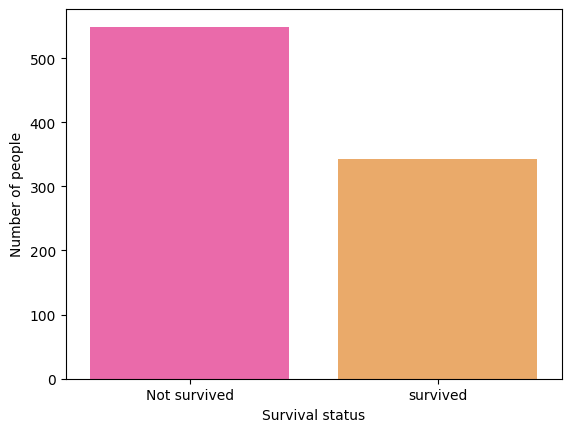

In [84]:
#Visualization of survival of people
#Countplot
sns.countplot(x='Survived',data=df,palette='spring',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

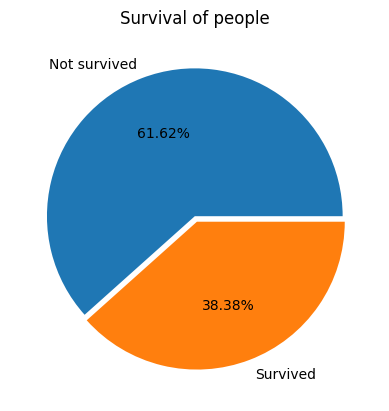

In [85]:
#Pie chart
plt.pie(df['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

Visualization of people survived from different gender.

In [86]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\1471506483.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df,palette='spring',)


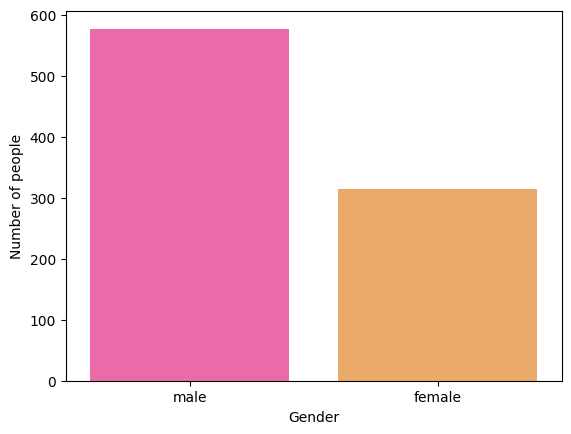

In [87]:
sns.countplot(x='Sex',data=df,palette='spring',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()


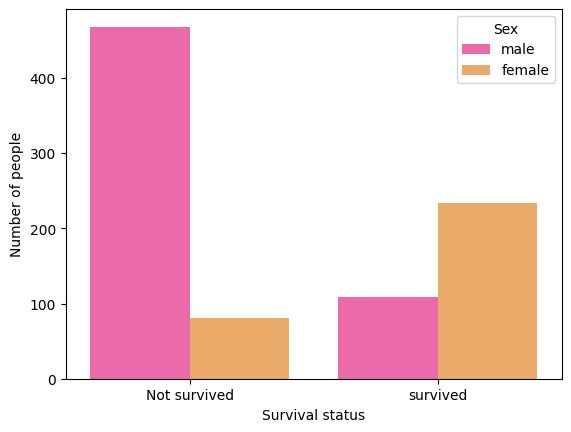

In [88]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='spring',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

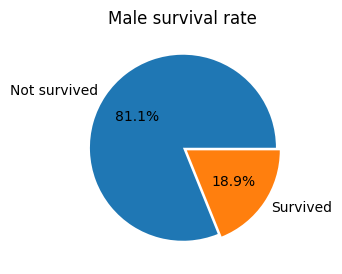

In [89]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

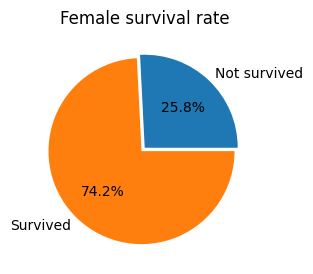

In [90]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\121402685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=df,palette='coolwarm',)


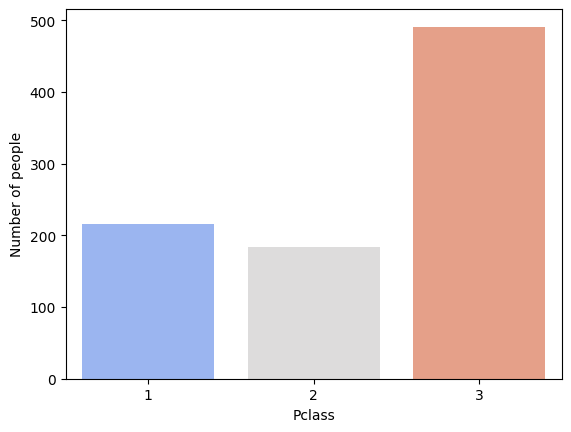

In [91]:
#Visualizing the population of different passenger class
sns.countplot(x='Pclass',data=df,palette='coolwarm',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

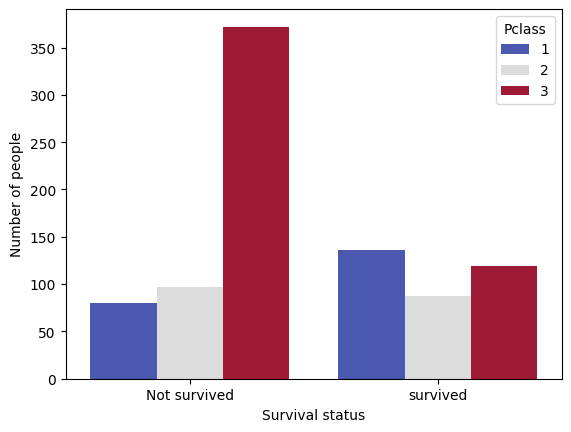

In [92]:
#Visualization of people survived from different passenger class
sns.countplot(x='Survived',hue='Pclass',data=df,palette='coolwarm',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

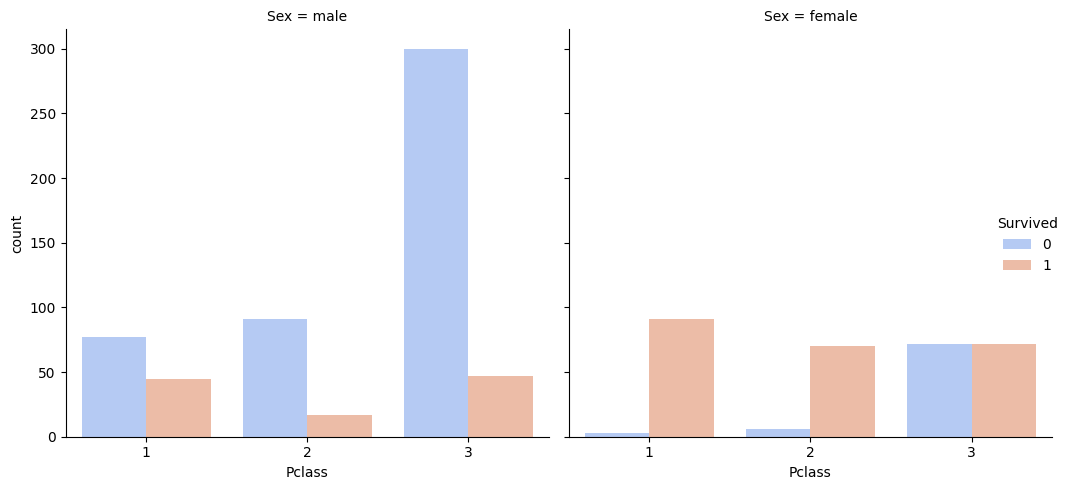

In [93]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =
df,palette='coolwarm' )
plt.tight_layout()

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\2707098967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked',data=df,palette='coolwarm',)


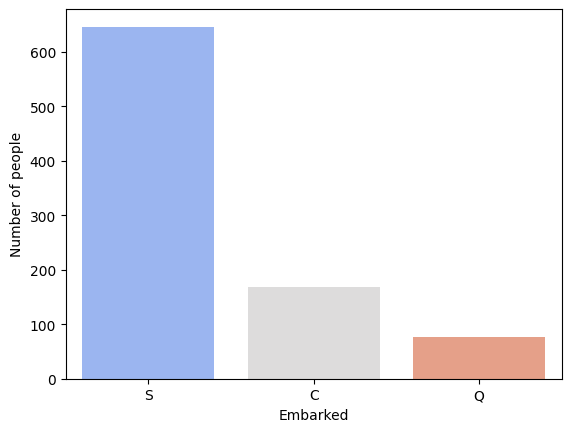

In [94]:
#Visualization of people survived from different Embarkment
sns.countplot(x='Embarked',data=df,palette='coolwarm',)
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()

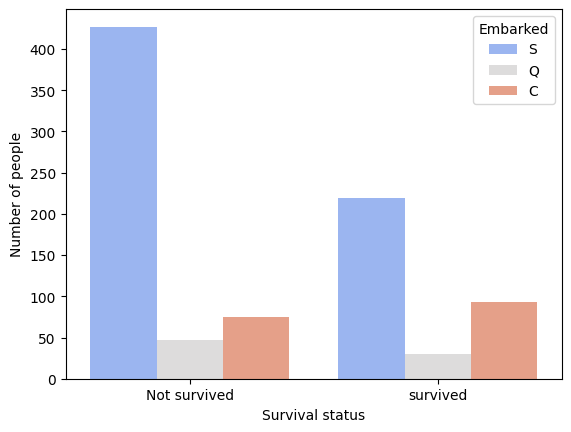

In [95]:
sns.countplot(x='Survived',hue='Embarked',data=df,palette='coolwarm',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\1641772109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\1641772109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')


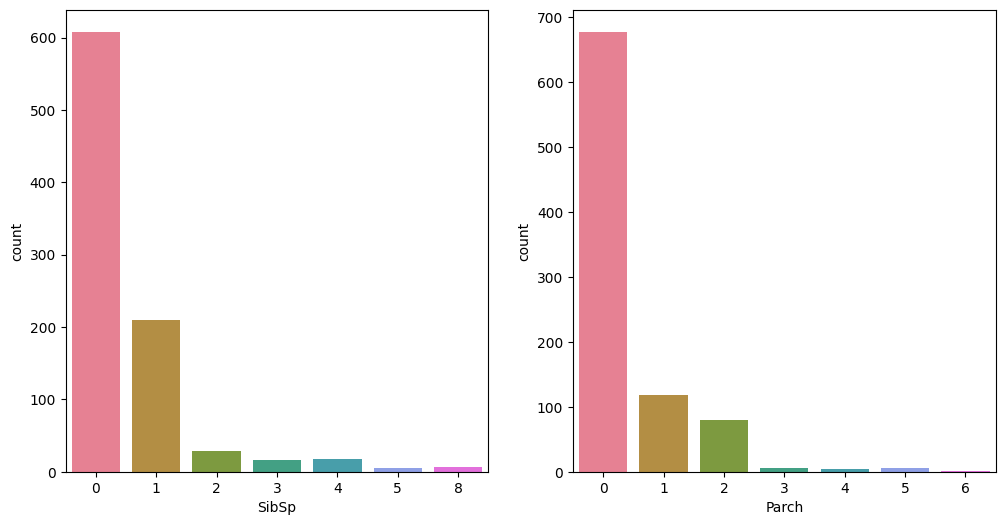

In [96]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')
plt.show()

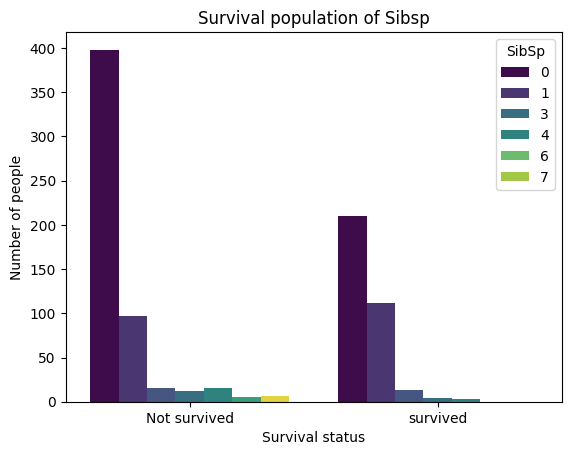

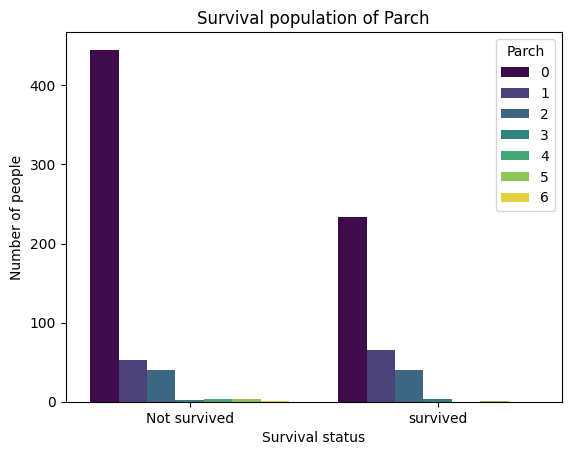

In [97]:
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

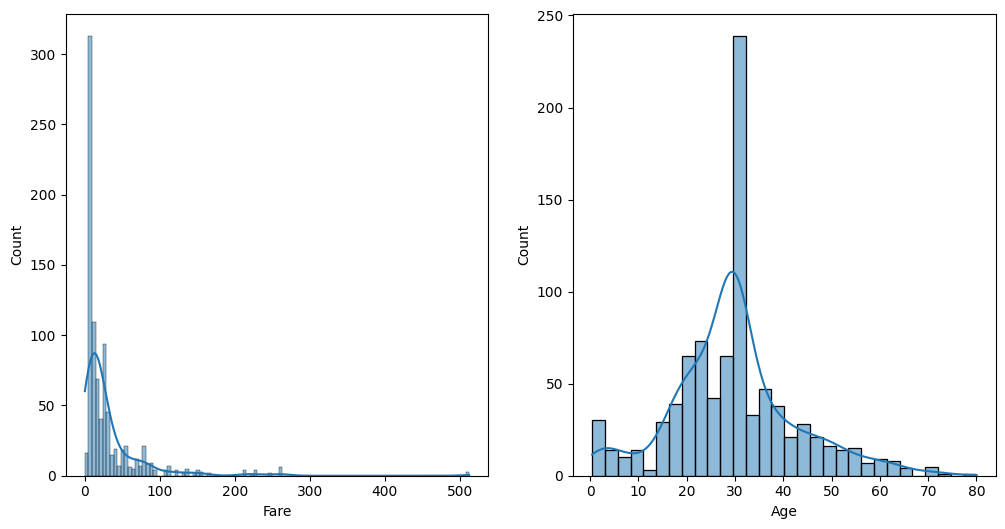

In [98]:
#Distribution of Fare and age
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Fare'], kde=True,ax=axes[0])
sns.histplot(df['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\1508974822.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")


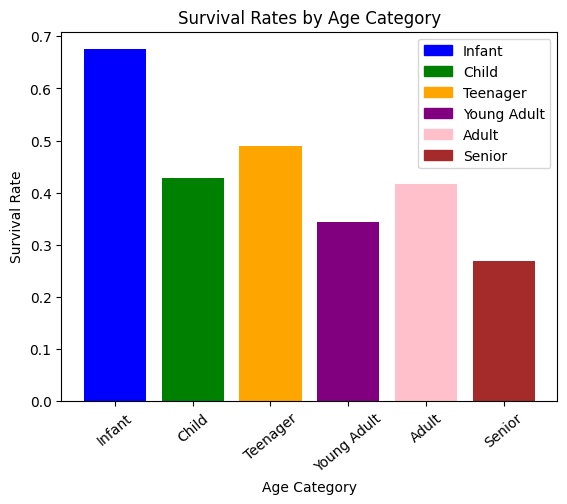

In [99]:
#Visualizing survival rate in different age category
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()


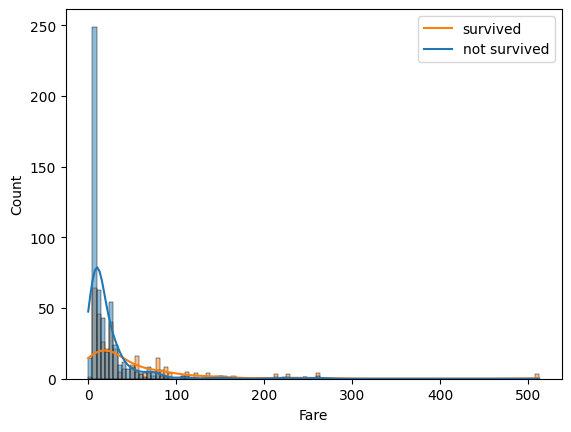

In [100]:
sns.histplot(x='Fare',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

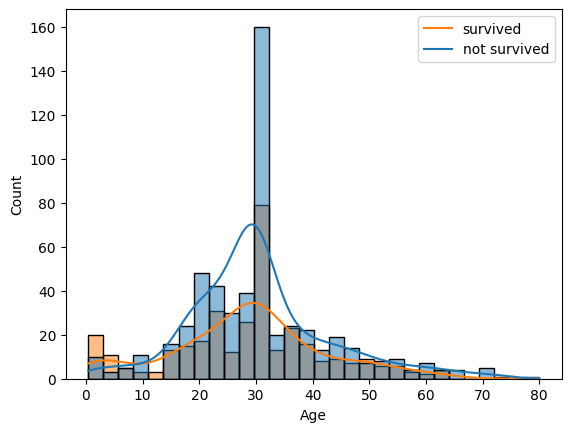

In [101]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

In [102]:
#Checking for correlation
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df.head()

C:\Users\sunit\AppData\Local\Temp\ipykernel_4820\2931563852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Adult


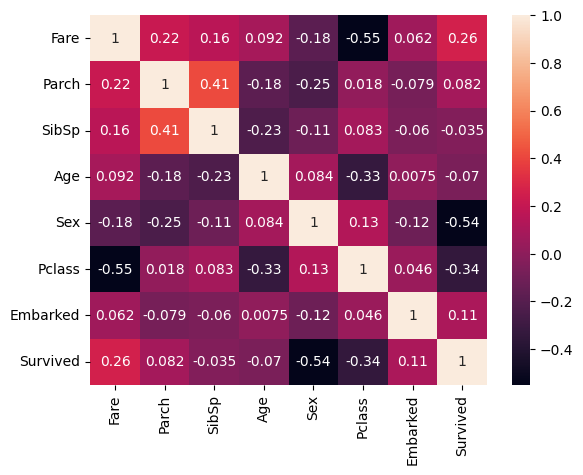

In [103]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
sns.heatmap(df_num.corr(),annot=True)
plt.show()

## Conclusion

### Gender Disparity
The survival rate among females was markedly higher compared to males. This observation aligns with the "women and children first" protocol followed during the Titanic disaster, reflecting societal norms of the era that prioritized the safety of women and children.

### Passenger Class Disparity
Although the majority of passengers were in Class 3, they had the lowest survival rate. This suggests a potential correlation between socio-economic status and survival, with passengers in higher classes likely having better access to lifeboats and other resources during the evacuation.

### Gender and Passenger Class Interaction
Further analysis reveals that males from Class 3 had the lowest survival rate. This indicates a compounded effect of gender and socio-economic status, where male passengers in the lower classes faced the highest risk of not surviving the disaster.

### Age Factor
Young adults had the lowest survival rate, indicating that age played a role in survival outcomes. This could be attributed to the "women and children first" policy, where younger individuals were given priority during the evacuation.

### Correlation with Survived Column
The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations with the survival outcome. This reinforces the significance of these factors in determining survival chances during the Titanic disaster.